In [26]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##**Problema de Negócio: As causas que fazem os funcionários deixarem seus empregos.**

A rotatividade é um problema extremamente comum dentro de qualquer empresa, principalmente as que têm problemas internos de **gestão de pessoas**. É importante que o RH saiba identificar as **causas que fazem os funcionários deixarem seus empregos** muito  que deixem seus postos, de modo que desenvolvam políticas de retenção, adequar sua forma de gestão, treinar os líderes de modo mais profissional.


"Existe uma pressuposição muito comum de que pessoas que estão "fora" do mercado há algum tempo não seriam bons candidatos para uma vaga. Entretanto, pesquisas e análises não comprovam essa hipótese, ou seja, não existe nenhuma relação com o fato do profissional estar afastado com o seu **desempenho**, uma pressuposição que não é confirmada ao utilizar **Análise de dados**."

Uma vez que utilizamos People Analytics devemos lutar contra pressuposições fortemente estabelecidas pelas equipes de RH. Temos dados em abundância e ferramentas analíticas que nos permitem realizar análises cada vez com maior precisão. Utilizaremos a **Linguagem R**.

**Referências:**

**The GeeksArrive In HR: People Analytics Is Here**
[link](https://http://www.forbes.com/sites/joshbersin/2015/02/01/geeks-arrive-in-hr-people-analytics-is-here/#6bdcc3607db3)


**People analytics reveals three things HR may be getting wrong**
[link](http://www.mckinsey.com/business-functions/organization/our-insights/people-analytics-reveals-three-things-hr-may-be-getting-wrong)



---

#**RH Analytics em R** - People Analytics, Ben Waber

Quais comportamentos no colocal de trabalho tornam as pessoas mais eficientes, felizes, criativas. 

###Investigar as causas que fazem os funcionários deixarem seus empregos:

#### 1- Quais são os aspectos mais importantes e que são decisivos para os colaboradores deixarem seus empregos?
####  2- Qual a melhor forma de fazer estas previsões: regressão logística ou árvore de decisão?


In [27]:
%%R
# Preparando os Dados
install.packages("ggplot2")
install.packages("scales")
install.packages("gmodels")
install.packages("rpart")
install.packages("ROCR")
install.packages("corrplot")

library(ggplot2)
library(scales)
library(gmodels) 
library(rpart)
library(ROCR)
library(corrplot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

read.csv()

In [28]:
%%R
# Carregando os dados
hr = read.csv("dados_func.csv")

dim()

In [29]:
%%R
dim(hr)

[1] 14999    10


View()

In [30]:
%%R
# View(hr)

NULL


attach()

In [31]:
%%R
attach(hr) # Anexar o hr à análise

R[write to console]: The following objects are masked from hr (pos = 3):

    acidente_trabalho, area, deixou_empresa, horas_medias_por_mes,
    nivel_satisfacao, numero_projetos, salario, tempo_empresa,
    ultima_avaliacao, ultima_promocao_5anos




---

##**Variável Target:** deixou_empresa

sumarry()

In [32]:
%%R
summary(hr)

 nivel_satisfacao ultima_avaliacao numero_projetos horas_medias_por_mes
 Min.   :0.0900   Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400   1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400   Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128   Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200   3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000   Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                       
 tempo_empresa    acidente_trabalho deixou_empresa   ultima_promocao_5anos
 Min.   : 2.000   Min.   :0.0000    Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000   1st Qu.:0.0000    1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000   Median :0.0000    Median :0.0000   Median :0.00000      
 Mean   : 3.498   Mean   :0.1446    Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000   3rd Qu.:0.0000    3rd Qu.:0.000

---

##**Função verifica os valores missing e sua proporção em relação ao dataset**

In [33]:
%%R
# Function para verificar valores missing e proporção de valores missing
propmiss <- function(dataframe) {
  m <- sapply(dataframe, function(x) {
    data.frame(
      nmiss = sum(is.na(x)),  
      n=length(x),
      propmiss = sum(is.na(x))/length(x) 
    )
  })
  d <- data.frame(t(m))
  d <- sapply(d, unlist)
  d <- as.data.frame(d)
  d$variable <- row.names(d)
  row.names(d) <- NULL
  d <- cbind(d[ncol(d)],d[-ncol(d)])
  return(d[order(d$propmiss), ])
}


In [34]:
%%R
# Aplicando a função ao dataset
propmiss(hr)

                variable nmiss     n propmiss
1       nivel_satisfacao     0 14999        0
2       ultima_avaliacao     0 14999        0
3        numero_projetos     0 14999        0
4   horas_medias_por_mes     0 14999        0
5          tempo_empresa     0 14999        0
6      acidente_trabalho     0 14999        0
7         deixou_empresa     0 14999        0
8  ultima_promocao_5anos     0 14999        0
9                   area     0 14999        0
10               salario     0 14999        0




##**Análise Exploratória** - Compreendendo os Dados

In [35]:
%%R
str(hr) # Visualizamos todas as nossas variáveis
# Duas variáveis do tipo fator classificadas automaticamente

'data.frame':	14999 obs. of  10 variables:
 $ nivel_satisfacao     : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ ultima_avaliacao     : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ numero_projetos      : int  2 5 7 5 2 2 6 5 5 2 ...
 $ horas_medias_por_mes : int  157 262 272 223 159 153 247 259 224 142 ...
 $ tempo_empresa        : int  3 6 4 5 3 3 4 5 5 3 ...
 $ acidente_trabalho    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ deixou_empresa       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ultima_promocao_5anos: int  0 0 0 0 0 0 0 0 0 0 ...
 $ area                 : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salario              : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


##Primeira tarefa: **Construir uma tabela de Frequência da Variável Target** *y*

In [36]:
%%R
# Frequência da Variável target y (deixou_empresa), o que queremos prever

cbind( Freq = table(deixou_empresa),
       Cumul = cumsum(table(deixou_empresa)),
       relative = round((prop.table(table(deixou_empresa))*100),2))



   Freq Cumul relative
0 11428 11428    76.19
1  3571 14999    23.81


- **76%** dos funcionários do conjunto **ainda trabalham** na empresa
- **24%** dos funcionários do conjunto **já saiu** da empresa


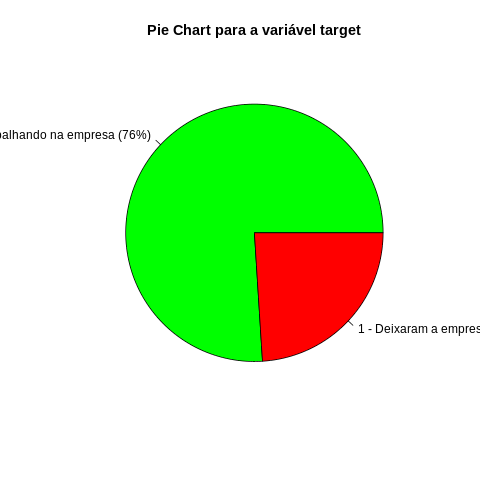

In [37]:
%%R
# Pie Chart para a variável target
slices <- c(76, 24)
lbls <- c("0 - Ainda trabalhando na empresa (76%)", "1 - Deixaram a empresa (24%)")
pie(slices, labels = lbls, main = "Pie Chart para a variável target", col = c("green", "red"))

##**Tabela de Frequência de acordo com os acidentes de trabalho**

In [38]:
%%R
# Frequência de acidentes de trabalho
cbind( Freq = table(acidente_trabalho),
       Cumul = cumsum(table(acidente_trabalho)),
       relative = round((prop.table(table(acidente_trabalho))*100),2))

   Freq Cumul relative
0 12830 12830    85.54
1  2169 14999    14.46


##**Tabela de Frequência de Promoção nos últimos 5 anos** 
### Apenas 2% dos funcionários receberam promoção nos últimos 5 anos!

In [39]:
%%R
# Frequência de promoção nos últimos 5 anos
cbind( Freq = table(ultima_promocao_5anos),
       Cumul = cumsum(table(ultima_promocao_5anos)),
       relative = round((prop.table(table(ultima_promocao_5anos))*100),2))

   Freq Cumul relative
0 14680 14680    97.87
1   319 14999     2.13


##**Total de Colaboradores por Departamento**

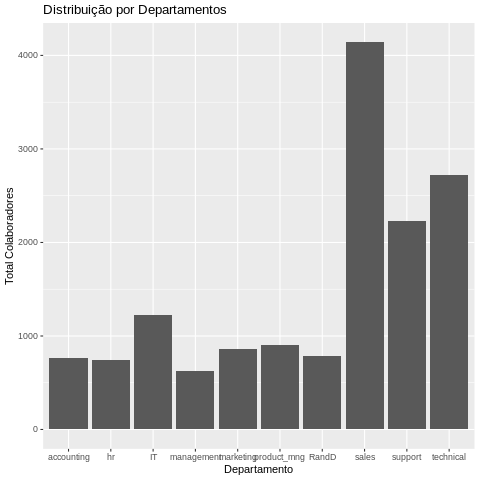

In [40]:
%%R
# Distribuição colaboradores por departamento
vec_dept <- as.vector(area)
unique(vec_dept)
vec_dept <- factor(vec_dept)
qplot(vec_dept, xlab = "Departamento", ylab = "Total Colaboradores") + ggtitle("Distribuição por Departamentos")

##**Faixa salarial**

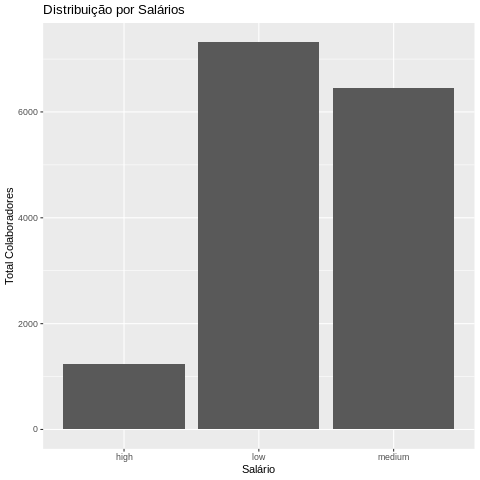

In [41]:
%%R
# Distribuição colaboradores por salário
vec_salary <- as.vector(salario)
unique(vec_salary)
vec_salary <- factor(vec_salary)
qplot(vec_salary, xlab = "Salário", ylab = "Total Colaboradores") + ggtitle("Distribuição por Salários")

##**Nível de Satisfação**

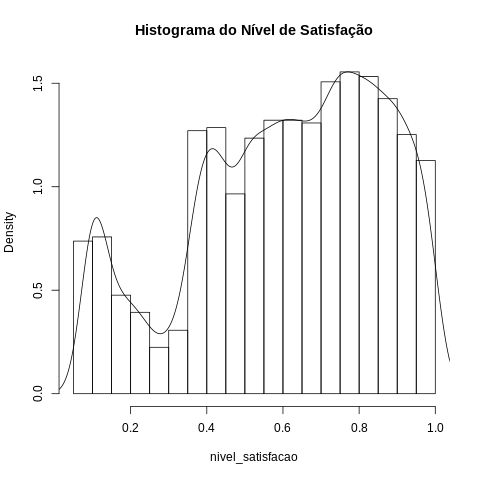

In [42]:
%%R
# Analisando o nível de satisfação 
hist(nivel_satisfacao, freq = F, main = "Histograma do Nível de Satisfação")
lines(density(nivel_satisfacao))

##**Avaliação colaboradores**

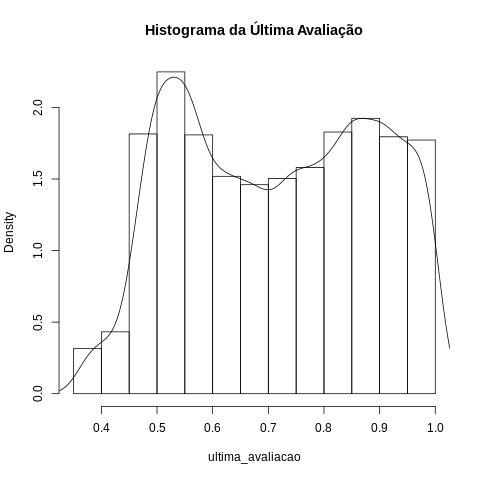

In [43]:
%%R
# Analisando a última avaliação do colaborador
hist(ultima_avaliacao, freq = F, main = "Histograma da Última Avaliação")
lines(density(ultima_avaliacao))

##**Número de projetos por colaborador**

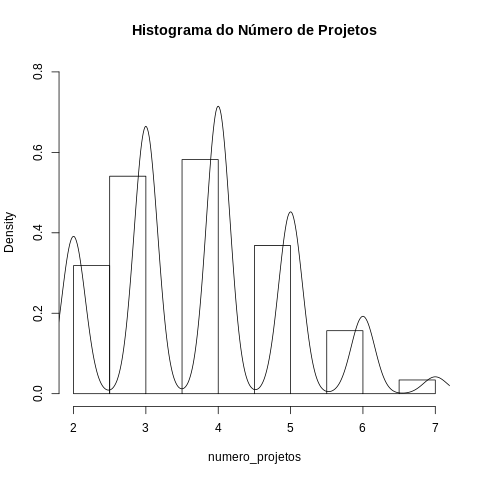

In [44]:
%%R
# Analisando o número de projetos - poucos colaboradores com mais de 6 projetos
hist(numero_projetos, ylim = c(0,0.8), freq = F, main = "Histograma do Número de Projetos")
lines(density(numero_projetos))

##**Número médio de horas trabalhadas por mês**

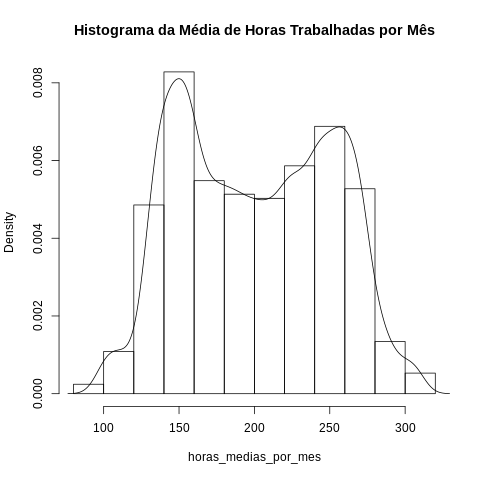

In [45]:
%%R
# Analisando o número médio de horas 
hist(horas_medias_por_mes, freq = F, main = "Histograma da Média de Horas Trabalhadas por Mês")
lines(density(horas_medias_por_mes))

##**Tempo trabalhado na empresa**
### A partir do 4° ano as pessoas começa a deixar a empresa

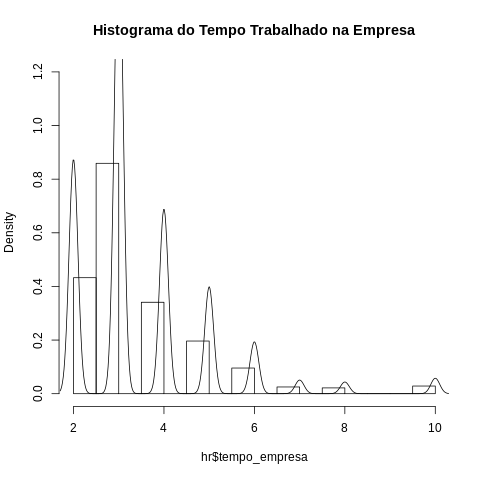

In [46]:
%%R
# Tempo de trabalho na empresa
hist(hr$tempo_empresa,  ylim = c(0,1.2), freq = F, main = "Histograma do Tempo Trabalhado na Empresa")
lines(density(tempo_empresa))

In [75]:
%%R
# Calculando a correlação entre cada variável
cor(hr[sapply(hr, is.numeric)])

                      nivel_satisfacao ultima_avaliacao numero_projetos
nivel_satisfacao            1.00000000      0.105021214    -0.142969586
ultima_avaliacao            0.10502121      1.000000000     0.349332589
numero_projetos            -0.14296959      0.349332589     1.000000000
horas_medias_por_mes       -0.02004811      0.339741800     0.417210634
tempo_empresa              -0.10086607      0.131590722     0.196785891
acidente_trabalho           0.05869724     -0.007104289    -0.004740548
deixou_empresa             -0.38837498      0.006567120     0.023787185
ultima_promocao_5anos       0.02560519     -0.008683768    -0.006063958
area_grupo                  0.01863120      0.004651652     0.013831759
                      horas_medias_por_mes tempo_empresa acidente_trabalho
nivel_satisfacao              -0.020048113  -0.100866073       0.058697241
ultima_avaliacao               0.339741800   0.131590722      -0.007104289
numero_projetos                0.417210634   0.19678589

#**Calculando Correlação entre Variáveis**

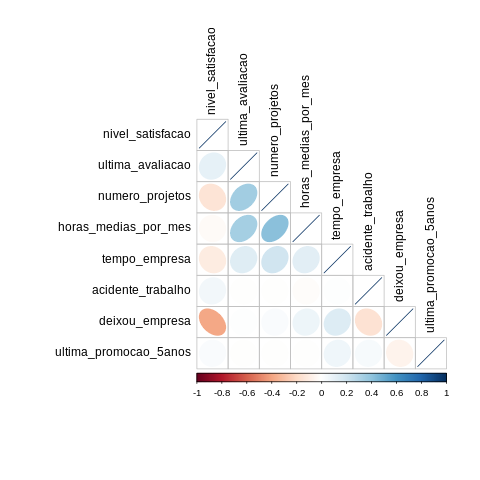

In [76]:
%%R
# Calculando a correlação - Existe uma alta correlação Negativa "nivel_satisfacao" vs "deixou_empresa"
par(mar=c(4,3,2,2))
par(oma=c(1,1,2,2))
corrplot(cor(hr[,c(1,2,3,4,5,6,7,8)]), type = "lower", tl.col = "black", method = "ellipse")

#**Nível de satisfação tem a maior correlação negativa com a variável target.**


---

# Análise bivariada

##**Correlação entre Saída da Empresa *vs* Acidente de Trabalho**
Funcionários acidentados deixam a empresa com maior frequência

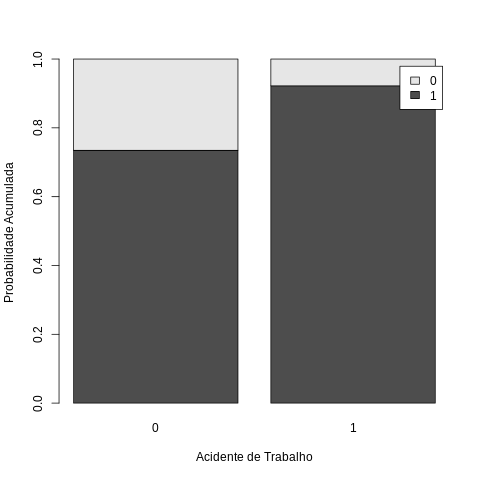

In [49]:
%%R
# Saída da empresa x Acidente de trabalho - Barplot
t <- table(deixou_empresa, hr$acidente_trabalho)
barplot(prop.table(t,2), legend = paste(unique(deixou_empresa)),
        ylab = "Probabilidade Acumulada", xlab = "Acidente de Trabalho")

##**Crosstable** - Saída empresa *vs* Acidente de Trabalho

In [50]:
%%R
# Cross Table
# Saída da empresa x Acidente de trabalho - Crosstable
CrossTable(deixou_empresa, hr$acidente_trabalho, prop.r = TRUE, prop.c = FALSE,
           prop.t = TRUE, prop.chisq = FALSE)



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14999 

 
               | hr$acidente_trabalho 
deixou_empresa |         0 |         1 | Row Total | 
---------------|-----------|-----------|-----------|
             0 |      9428 |      2000 |     11428 | 
               |     0.825 |     0.175 |     0.762 | 
               |     0.629 |     0.133 |           | 
---------------|-----------|-----------|-----------|
             1 |      3402 |       169 |      3571 | 
               |     0.953 |     0.047 |     0.238 | 
               |     0.227 |     0.011 |           | 
---------------|-----------|-----------|-----------|
  Column Total |     12830 |      2169 |     14999 | 
---------------|-----------|-----------|-----------|

 


##**Crosstable** - Saída empresa *vs* Promoção nos últimos 5 anos

In [51]:
%%R
# Saída da empresa x Promoção nos últimos 5 anos - Crosstable
CrossTable(deixou_empresa, ultima_promocao_5anos, prop.r = TRUE, prop.c = FALSE,
           prop.t = TRUE, prop.chisq = FALSE)



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14999 

 
               | ultima_promocao_5anos 
deixou_empresa |         0 |         1 | Row Total | 
---------------|-----------|-----------|-----------|
             0 |     11128 |       300 |     11428 | 
               |     0.974 |     0.026 |     0.762 | 
               |     0.742 |     0.020 |           | 
---------------|-----------|-----------|-----------|
             1 |      3552 |        19 |      3571 | 
               |     0.995 |     0.005 |     0.238 | 
               |     0.237 |     0.001 |           | 
---------------|-----------|-----------|-----------|
  Column Total |     14680 |       319 |     14999 | 
---------------|-----------|-----------|-----------|

 


##**Combinar variáveis com aggregate( )**
###RH é a área que mais deixou a a empresa

In [52]:
%%R
# Saída da empresa x Area - Aggregate
aggregate(deixou_empresa ~ area, FUN = mean)

          area deixou_empresa
1   accounting      0.2659713
2           hr      0.2909337
3           IT      0.2224939
4   management      0.1444444
5    marketing      0.2365967
6  product_mng      0.2195122
7        RandD      0.1537484
8        sales      0.2449275
9      support      0.2489906
10   technical      0.2562500


##**Salários baixos convertem em maior número de demissões**

In [77]:
%%R
aggregate(deixou_empresa ~ salario, FUN = mean)

  salario deixou_empresa
1    high     0.06628941
2     low     0.29688354
3  medium     0.20431275


- Pessoas que não tiveram uma promoção nos últimos 5 anos deixaram mais do que aqueles que tiveram.

- Pessoas da área de Gestão têm a média mais baixa de saída da empresa e pessoas de RH a média mais alta.

- Pessoas com Salário baixo têm maior média de saída da empresa em comparação com outras categorias.


---

##**Transformação de Dados**

##**Agrupar departamentos com áreas similares**

In [53]:
%%R
# Categorizando a variável area de acordo com a taxa média de saída da empresa e criando grupos de áreas
group1 <- c('hr')
group2 <- c('accounting','sales','support','technical')
group3 <- c('marketing', 'IT','product_mng')
group4 <- c('management','RandD')


if para classificar devidamente os grupos

In [54]:
%%R
hr$area_grupo <- ifelse(area %in% group1, 1,
                       ifelse(area %in% group2, 2,
                              ifelse(area %in% group3, 3,4)))

aggregate para analisar a demissão de acordo com o grupo de áreas ao qual pertence

##**O grupo com maior número de demissões é o Grupo 1**

In [55]:
%%R
aggregate(deixou_empresa ~ hr$area_grupo, FUN = mean)

  hr$area_grupo deixou_empresa
1             1      0.2909337
2             2      0.2506088
3             3      0.2256445
4             4      0.1496119


---

##**Dividindo os dados de Treino e Teste**

In [78]:
%%R
# Dividindo 70% para treino e 30% para teste
hr_train <- sample(nrow(hr), floor(nrow(hr)*0.7))
train <- hr[hr_train,]
test <- hr[-hr_train,]


#<blue>**Modelo Preditivo </blue>**

##**Regressão Logística**

###**Modelo Linear Generalizado - GLM**

In [79]:
%%R
# Testando todas as variáveis
names(hr)
model <- glm(formula = (deixou_empresa) ~  nivel_satisfacao
             + ultima_avaliacao
             + numero_projetos
             + horas_medias_por_mes
             + tempo_empresa
             + acidente_trabalho
             + ultima_promocao_5anos
             + area
             + salario,
             family = binomial(logit), # regressão logística
             data = train) # conjunto de dados de TREINO acima

##**Número de relevância da variável na última coluna**
- nivel_satisfacao
- ultima_avaliacao
- numero_projetos
- horas_medias_por_mes
- tempo_empresa
- acidente_trabalho
- ultima_promocao_5anos
- salariolow
- salariomedium

In [80]:
%%R
summary(model)


Call:
glm(formula = (deixou_empresa) ~ nivel_satisfacao + ultima_avaliacao + 
    numero_projetos + horas_medias_por_mes + tempo_empresa + 
    acidente_trabalho + ultima_promocao_5anos + area + salario, 
    family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1921  -0.6599  -0.4015  -0.1197   3.0922  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.6517677  0.2329999  -7.089 1.35e-12 ***
nivel_satisfacao      -4.1197436  0.1178068 -34.970  < 2e-16 ***
ultima_avaliacao       0.9042849  0.1782874   5.072 3.94e-07 ***
numero_projetos       -0.3074209  0.0255463 -12.034  < 2e-16 ***
horas_medias_por_mes   0.0044452  0.0006166   7.210 5.61e-13 ***
tempo_empresa          0.2633074  0.0185944  14.161  < 2e-16 ***
acidente_trabalho     -1.5193812  0.1051285 -14.453  < 2e-16 ***
ultima_promocao_5anos -1.5411094  0.3089065  -4.989 6.07e-07 ***
areahr                 0.1644849  0.

##**Função anova e teste qui² ajudam a melhor definir quais variáveis mais relevantes**


Todas as variáveis se mostram relevantes, sendo respectivamente os principais fatores para deixar a empresa:
- nível de satisfação
- acidente de trabalho
- salário


In [59]:
%%R
anova(model, test = "Chisq")

Analysis of Deviance Table

Model: binomial, link: logit

Response: (deixou_empresa)

Terms added sequentially (first to last)


                      Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                                  10498    11481.4              
nivel_satisfacao       1  1549.18     10497     9932.2 < 2.2e-16 ***
ultima_avaliacao       1    24.71     10496     9907.5 6.681e-07 ***
numero_projetos        1    74.73     10495     9832.8 < 2.2e-16 ***
horas_medias_por_mes   1    60.56     10494     9772.3 7.124e-15 ***
tempo_empresa          1   122.58     10493     9649.7 < 2.2e-16 ***
acidente_trabalho      1   271.73     10492     9377.9 < 2.2e-16 ***
ultima_promocao_5anos  1    58.93     10491     9319.0 1.630e-14 ***
area                   9    60.94     10482     9258.1 8.832e-10 ***
salario                2   294.85     10480     8963.2 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##**Previsões com dados de Teste**

In [60]:
%%R
# Previsões
p <- predict(model, test, type = "response")
pr <- prediction(p, test$deixou_empresa)


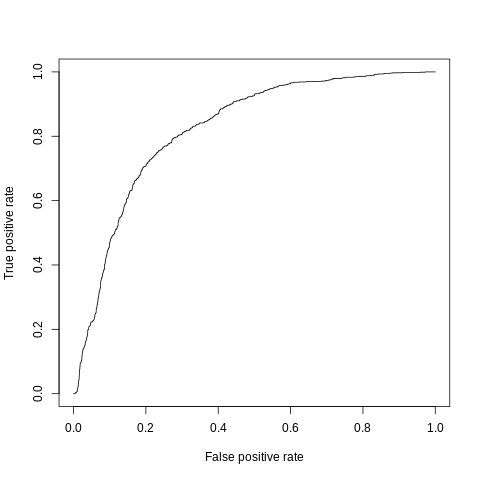

In [61]:
%%R
# Calculando a taxa de verdadeiro positivo e falso positivo
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

##**Nível de precisão de 0.82**

In [62]:
%%R
# Area Under the Curve
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.8224268


---

##**Árvore de Decisão**

Usando a função **rpart** com as mesmas variáveis da regressão logística

In [ ]:
%%R  
# Usando a mesma combinação de variáveis
tree1 <- rpart(formula = (deixou_empresa) ~  nivel_satisfacao
               + ultima_avaliacao
               + numero_projetos
               + horas_medias_por_mes
               + tempo_empresa
               + acidente_trabalho
               + ultima_promocao_5anos
               + area
               + salario,
               data = train,
               method = "class")
tree1


Classification tree:
rpart(formula = (deixou_empresa) ~ nivel_satisfacao + ultima_avaliacao + 
    numero_projetos + horas_medias_por_mes + tempo_empresa + 
    acidente_trabalho + ultima_promocao_5anos + area + salario, 
    data = train, method = "class")

Variables actually used in tree construction:
[1] horas_medias_por_mes nivel_satisfacao     numero_projetos     
[4] tempo_empresa        ultima_avaliacao    

Root node error: 2481/10499 = 0.23631

n= 10499 

        CP nsplit rel error  xerror      xstd
1 0.237001      0   1.00000 1.00000 0.0175447
2 0.187021      1   0.76300 0.76300 0.0158772
3 0.076784      3   0.38896 0.38896 0.0119316
4 0.052801      5   0.23539 0.23539 0.0094657
5 0.029827      6   0.18259 0.18259 0.0083916
6 0.016929      7   0.15276 0.15276 0.0077039
7 0.010883      8   0.13583 0.13744 0.0073212
8 0.010000      9   0.12495 0.13341 0.0072166


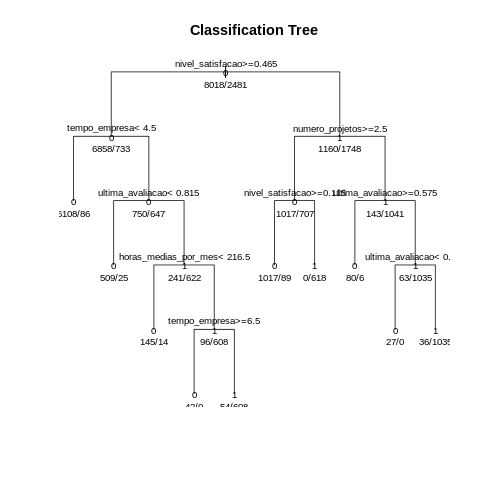

In [64]:
%%R
# Plot
plot(tree1, uniform = TRUE, main = "Classification Tree")
text(tree1, use.n = TRUE, all = TRUE, cex = .8)
printcp(tree1)

####Plotagem da árvore de decisão que nos leva identificar quais são os aspectos mais relevantes a deixar a empresa

In [65]:
%%R
# Determinar Erros da Árvore
tree1$cptable[which.min(tree1$cptable[,"xerror"]),"CP"]

[1] 0.01


####Determinar os Erros da árvore para identificar a necessidade de Prune da árvore - Reduzir nodes

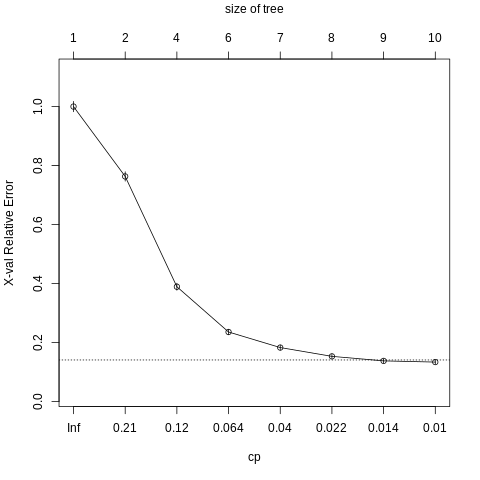

In [66]:
%%R
plotcp(tree1)

Não será necessário fazer o prune da árvore



---

## Calcular Confusion Matrix com Dados de Treino

In [67]:
%%R
# Confusion Matrix - Dados de Treino
conf_matrix_tree <- table(train$deixou_empresa, predict(tree1, type = "class"))
rownames(conf_matrix_tree) <- paste("Actual", rownames(conf_matrix_tree), sep = ":")
colnames(conf_matrix_tree) <- paste("Pred", colnames(conf_matrix_tree), sep = ":")
print(conf_matrix_tree)

# quando o valor era 0, o modelo previu 7928 * 0 e 90 * 1
# quando o valor era 1, o modelo previu 220  * 0 e 2261 * 1
# quando

          
           Pred:0 Pred:1
  Actual:0   7928     90
  Actual:1    220   2261


In [68]:
%%R
# Dados de Teste
test_tree = predict(tree1, test, type = "prob")

In [69]:
%%R
# Armazenando o score de performance do modelo
pred_tree <-prediction(test_tree[,2], test$deixou_empresa)

In [70]:
%%R
#  Area under the Curve
perf_tree <- performance(pred_tree,"auc")
perf_tree

A performance instance
  'Area under the ROC curve'


In [71]:
%%R
# Calculando a taxa de verdadeiro positivo e falso positivo
perf_tree <- performance(pred_tree, "tpr", "fpr")

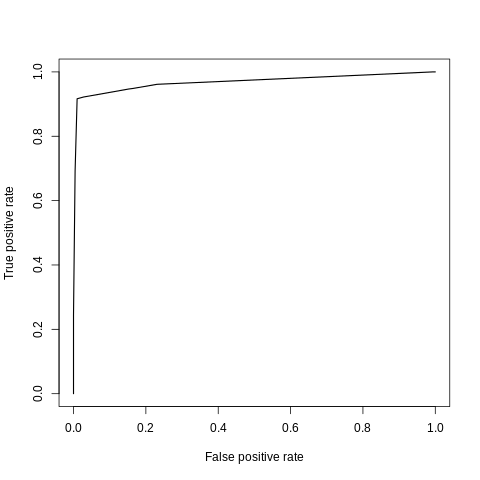

In [72]:
%%R
# Plotando Curva agora com Árvores de Decisão
plot(perf_tree,  lwd = 1.5)

##**Conclusão**

## 1- Quais são os aspectos mais importantes e que são decisivos para os colaboradores deixarem seus empregos?

De acordo com a Regressão logístisca são: nível de satisfação, acidente de trabalho e salário como os aspectos mais relevantes.

A árvore de decisão, os mais importantes são o nível de satisfação, o tempo gasto na empresa e número de projetos realizados.

## 2- Qual a melhor forma de fazer estas previsões: regressão logística ou árvore de decisão?

Para esse conjunto de dados, a árvore de decisão obteve um melhor desempenho no conjunto de dados de teste. Podemos observar isso pelas curvas ROC abaixo.


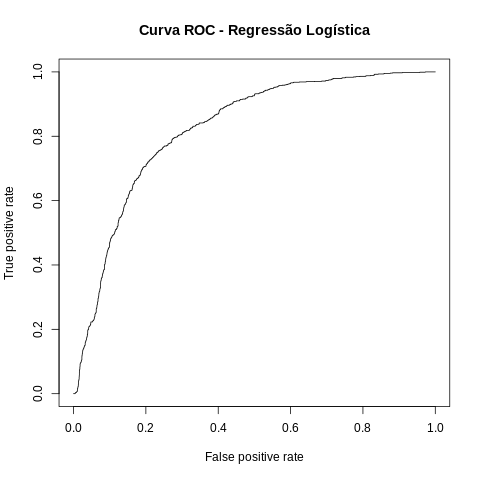

In [73]:
%%R
plot(prf)
title("Curva ROC - Regressão Logística")

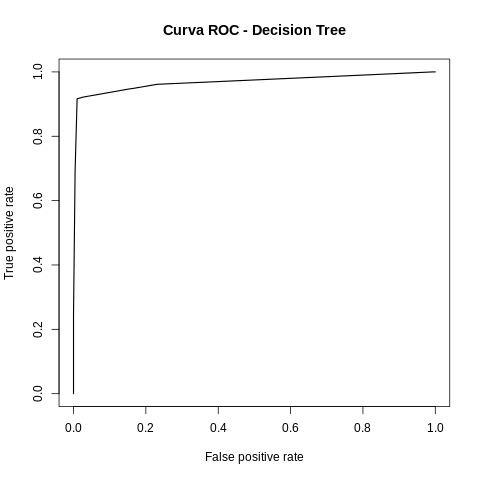

In [74]:
%%R
plot(perf_tree,  lwd = 1.5)
title("Curva ROC - Decision Tree")